# NLP Preprocessing

#### This notebook compares different NLP preprocessing techniques. Each section includes code examples to demonstrate how to use these libraries for common NLP tasks.






## Preprocessing tasks
### Tokenization 
##### __Tokenization__ is the process of splitting text into individual units called __tokens__. These tokens can be words, phrases, symbols, or other meaningful elements. Tokenization is typically the first step in text preprocessing for NLP tasks.

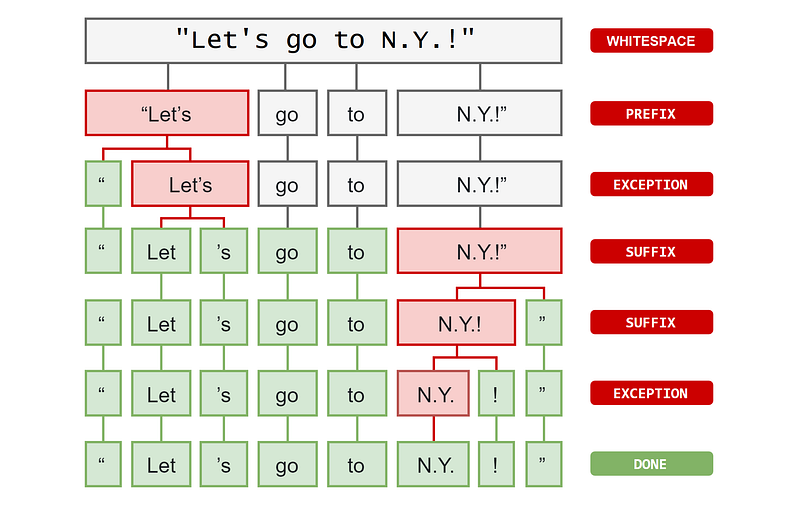


In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "App.le isn't looking at buying U.K. startup for $1 billion. orange is    My favorite fruit. How about you? Maybe yes; Maybe no"
words = word_tokenize(text)
sentences = sent_tokenize(text)

print("Words:", words)
print("Sentences:", sentences)


Words: ['App.le', 'is', "n't", 'looking', 'at', 'buying', 'U.K.', 'startup', 'for', '$', '1', 'billion', '.', 'orange', 'is', 'My', 'favorite', 'fruit', '.', 'How', 'about', 'you', '?', 'Maybe', 'yes', ';', 'Maybe', 'no']
Sentences: ["App.le isn't looking at buying U.K. startup for $1 billion.", 'orange is    My favorite fruit.', 'How about you?', 'Maybe yes; Maybe no']


The `nltk.corpus.gutenberg` module in the Natural Language Toolkit (NLTK) provides access to the Project Gutenberg corpus, which is a collection of free, public-domain texts from Project Gutenberg. This corpus includes texts from a variety of authors and genres, making it a valuable resource for text analysis and natural language processing.

In [3]:
import nltk
nltk.download('gutenberg')
from nltk.corpus import gutenberg as gut

print(gut.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [4]:
alice_text = nltk.corpus.gutenberg.raw('carroll-alice.txt')
print(alice_text)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

In [5]:
words = word_tokenize(alice_text)
print(f"word count: ", len(words))
print(words[:50])   


word count:  33535
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her']


In [6]:
sentences = sent_tokenize(alice_text)

text = ' '.join(sentences[:5]) #first 5
words = word_tokenize(text)

print(text)
print(words)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?' So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her. There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear! Oh dear!
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'begin

### Handle Punctuations and Numbers

##### For some use cases, punctuations and numbers should be removed/handled. 


In [7]:
import re
import string
import timeit

text = "Hello, world! This is a test sentence with numbers 123 and punctuation!"

# using Regular Expressions
def remove_punct_and_numbers_re(text):
    return re.sub('[^a-zA-Z]', ' ', text).strip().lower()

# using translate and maketrans
def remove_punct_and_numbers_translate(text):
    translator = str.maketrans('', '', string.punctuation + string.digits)
    return text.translate(translator).strip().lower()

result_re = remove_punct_and_numbers_re(text)
result_translate = remove_punct_and_numbers_translate(text)

print("Result using re.sub:")
print(result_re)
print("\nResult using str.translate:")
print(result_translate)


Result using re.sub:
hello  world  this is a test sentence with numbers     and punctuation

Result using str.translate:
hello world this is a test sentence with numbers  and punctuation


### Handle multiple succeeding white spaces


In [8]:
result_re = re.sub(r'\s+', ' ', result_re)
result_translate = re.sub(r'\s+', ' ', result_translate)

print("Result using re.sub:")
print(result_re)
print("\nResult using str.translate:")
print(result_translate)


Result using re.sub:
hello world this is a test sentence with numbers and punctuation

Result using str.translate:
hello world this is a test sentence with numbers and punctuation


In [9]:
assert result_re == result_translate, "Results differ between re.sub and str.translate methods"

# Measure execution time using timeit
time_re = timeit.timeit(lambda: remove_punct_and_numbers_re(text), number=100000)
time_translate = timeit.timeit(lambda: remove_punct_and_numbers_translate(text), number=100000)

print(f"\nExecution time using re.sub: {time_re:.6f} seconds")
print(f"Execution time using str.translate: {time_translate:.6f} seconds")


Execution time using re.sub: 0.222283 seconds
Execution time using str.translate: 0.189428 seconds


### Assignment -->  Use Case 1: Removing subsequent occurrence of words.

Removing subsequent occurrences of words (also known as deduplication of adjacent duplicate words) is a common preprocessing step in NLP. This task is important because: 
1. Repeated words can distort text analysis, especially in tasks like text summarization, sentiment analysis, and language modeling.
2. Removing redundant words improves the readability of the text, making it more coherent.
3. Reducing noise in the text data can improve the performance of machine learning models.

Input:
A single string text that may contain multiple sentences and words. Words are separated by spaces.

Output:
A single string with subsequent duplicate words removed.

Constraints:
The input string can be empty.
The words are case-sensitive, meaning "Word" and "word" are considered different.





#### Tokenization with `spacy`

#### https://spacy.io/usage/processing-pipelines

In [10]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.8 MB/s eta 0:00:00a 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [11]:
import spacy

In [12]:
nlp = spacy.load('en_core_web_sm')

text = "Hello, world! This isn't a test sentence with Dr. punctuation."

doc = nlp(text)

sentences_spacy = list(doc.sents)
print("Sentences (spaCy):", [sentence.text for sentence in sentences_spacy])

words_spacy = [token.text for token in doc]
print("Words (spaCy):", words_spacy)


Sentences (spaCy): ['Hello, world!', "This isn't a test sentence with Dr. punctuation."]
Words (spaCy): ['Hello', ',', 'world', '!', 'This', 'is', "n't", 'a', 'test', 'sentence', 'with', 'Dr.', 'punctuation', '.']


In [13]:
# text = "Hello, world! This isn't a test sentence with Dr. punctuation."
# text = "Mr. Smith's cat, Fluffy, doesn't like to play. E.g., he prefers to sleep!"
text = "Dr. Smith's email is dr.smith@example.com. He'll be available from 5:00pm - 6:00pm."



# NLTK Tokenization
sentences_nltk = sent_tokenize(text)
words_nltk = word_tokenize(text)

# spaCy Tokenization
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences_spacy = list(doc.sents)
words_spacy = [token.text for token in doc]

print("NLTK Sentences:", sentences_nltk)
print("NLTK Words:", words_nltk)
print("spaCy Sentences:", [sentence.text for sentence in sentences_spacy])
print("spaCy Words:", words_spacy)

print("\n\nNLTK Sentences:", len(sentences_nltk))
print("NLTK Words:", len(words_nltk))
print("spaCy Sentences:", len(sentences_spacy))
print("spaCy Words:", len(words_spacy))


NLTK Sentences: ["Dr. Smith's email is dr.smith@example.com.", "He'll be available from 5:00pm - 6:00pm."]
NLTK Words: ['Dr.', 'Smith', "'s", 'email', 'is', 'dr.smith', '@', 'example.com', '.', 'He', "'ll", 'be', 'available', 'from', '5:00pm', '-', '6:00pm', '.']
spaCy Sentences: ["Dr. Smith's email is dr.smith@example.com.", "He'll be available from 5:00pm - 6:00pm."]
spaCy Words: ['Dr.', 'Smith', "'s", 'email', 'is', 'dr.smith@example.com', '.', 'He', "'ll", 'be', 'available', 'from', '5:00pm', '-', '6:00pm', '.']


NLTK Sentences: 2
NLTK Words: 18
spaCy Sentences: 2
spaCy Words: 16


| Feature                         | spaCy                                      | NLTK                                           | TextBlob                                  |
|---------------------------------|--------------------------------------------|------------------------------------------------|-------------------------------------------|
| **Library**                     | spaCy                                      | NLTK                                           | TextBlob                                  |
| **Word Tokenization**           | - Uses the `tokenizer` component in its pipeline<br>- Leverages statistical models and linguistic rules to handle complex cases<br>- Handles punctuation, contractions, and special characters<br>- Tokens are `Token` objects with rich linguistic features | - Uses the `word_tokenize` function<br>- Relies on the `Punkt` tokenizer model<br>- Handles punctuation and some special cases<br>- Tokens are simple strings | - Uses the `words` property of a `TextBlob` object<br>- Internally uses NLTK's `word_tokenize`<br>- Handles punctuation and basic cases<br>- Tokens are `Word` objects, which are subclasses of strings with additional methods |
| **Sentence Tokenization**       | - Uses the `sentencizer` component or statistical models within the pipeline<br>- Identifies sentence boundaries using punctuation and other linguistic clues<br>- Handles abbreviations and complex sentence structures | - Uses the `sent_tokenize` function<br>- Relies on the `Punkt` tokenizer model<br>- Handles common abbreviations and sentence boundary cases | - Uses the `sentences` property of a `TextBlob` object<br>- Internally uses NLTK's `sent_tokenize`<br>- Handles basic sentence boundary cases |



In [14]:
model_name = 'en_core_web_sm'
def inspect_model(model_name):
    print(f"\nInspecting model: {model_name}")
    nlp = spacy.load(model_name)
    
    # Print the pipeline components
    print(f"\nPipeline components: {nlp.pipe_names}")
    
    # Print some information about the vocabulary
    print(f"\nVocab length: {len(nlp.vocab)}")
    if nlp.vocab.vectors:
        print(f"Number of word vectors: {len(nlp.vocab.vectors)}")
        print(f"Vector dimensions: {nlp.vocab.vectors_length}")
    else:
        print("Word vectors: Not included")
    
    # Print the recognized entities
    print("\nNamed Entity Recognizer:")
    for label in nlp.get_pipe('ner').labels:
        print(f"  - {label}")

# Inspect the small model
inspect_model('en_core_web_sm')


Inspecting model: en_core_web_sm

Pipeline components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Vocab length: 764
Word vectors: Not included

Named Entity Recognizer:
  - CARDINAL
  - DATE
  - EVENT
  - FAC
  - GPE
  - LANGUAGE
  - LAW
  - LOC
  - MONEY
  - NORP
  - ORDINAL
  - ORG
  - PERCENT
  - PERSON
  - PRODUCT
  - QUANTITY
  - TIME
  - WORK_OF_ART


## Understanding Stop Words

_Stop Words_ are common words that carry little meaningful information by themselves and are usually removed from text during preprocessing in natural language processing (NLP). Examples include words like "is", "and", "the", "in", etc. Removing stop words can help _reduce noise_ in the data and _improve the performance of machine learning models_ by focusing on the more meaningful words.

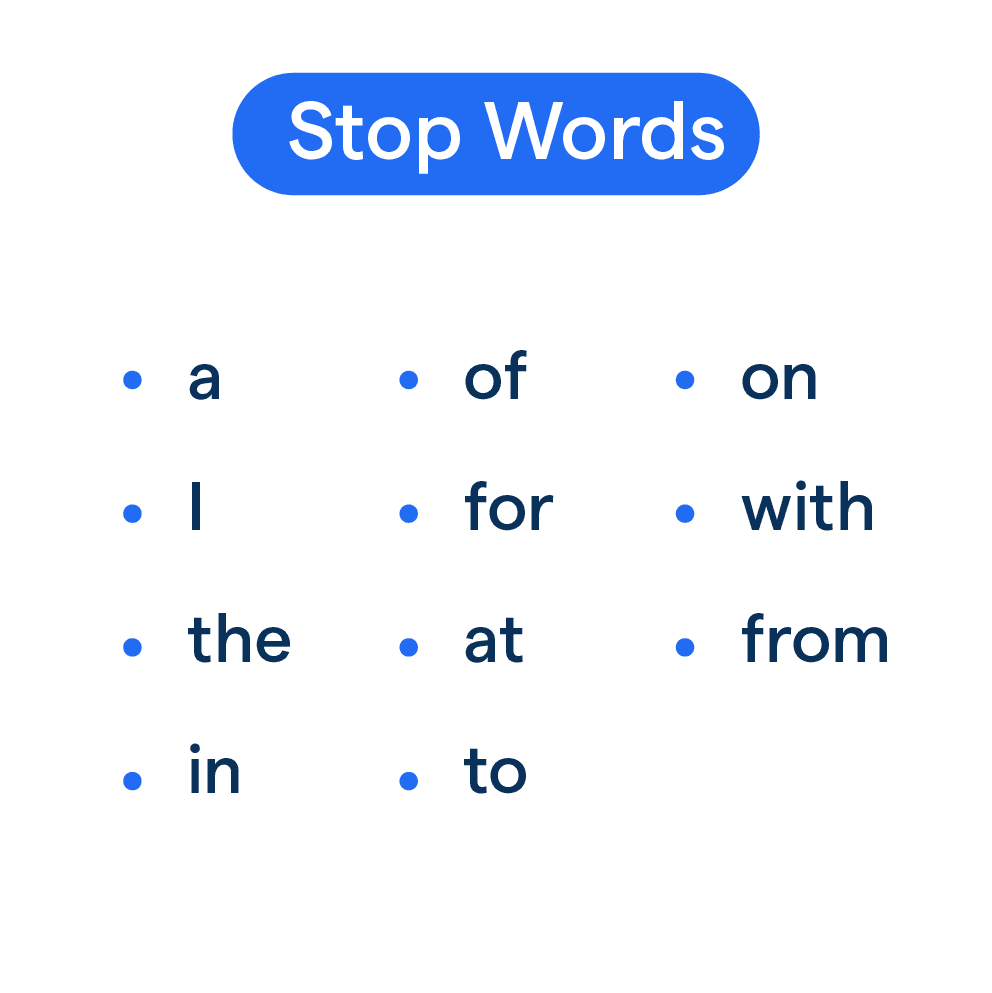



### Stop Words Removal in `nltk`
`nltk` provides a list of common stop words which can be used to filter out these words from text.

In [15]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

text = "This is a sample sentence, showing off the stop words filtration."

words = word_tokenize(text)

stop_words = set(stopwords.words('english'))

filtered_words_nltk = [word for word in words if word.lower() not in stop_words]

print("Original Words (NLTK):", words)
print("Filtered Words (NLTK):", filtered_words_nltk)


Original Words (NLTK): ['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
Filtered Words (NLTK): ['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NLTK's stop words

In [16]:

from nltk.corpus import stopwords

stop_words = stopwords.words('german')

print("Type of stop_words:", type(stop_words))
print("Number of stop words:", len(stop_words))
print("First 10 stop words:", stop_words[:10])


Type of stop_words: <class 'list'>
Number of stop words: 232
First 10 stop words: ['aber', 'alle', 'allem', 'allen', 'aller', 'alles', 'als', 'also', 'am', 'an']


Stop Words in `spacy`


In [17]:
nlp = spacy.load('en_core_web_sm')

stop_words_spacy = nlp.Defaults.stop_words
print("Number of stop words in spaCy:", len(stop_words_spacy))
print("First 10 stop words in spaCy:", list(stop_words_spacy)[:10])


Number of stop words in spaCy: 326
First 10 stop words in spaCy: ['six', 'various', 'since', 'less', "'ll", 'please', 'have', 'them', 'namely', 'across']


In [18]:
text = "This is a sample sentence, showing off the stop words filtration."
doc = nlp(text)

filtered_words_spacy = [token.text for token in doc if not token.is_stop]

print("Original Words (spaCy):", [token.text for token in doc])
print("Filtered Words (spaCy):", filtered_words_spacy)


Original Words (spaCy): ['This', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.']
Filtered Words (spaCy): ['sample', 'sentence', ',', 'showing', 'stop', 'words', 'filtration', '.']


### Assignment --> Use Case 2: Adding Custom Stop Words to `nltk` and `spacy`


Adding custom stop words is a crucial preprocessing step in NLP. This task is important because:

Customizing stop words allows for more flexible and relevant text cleaning tailored to specific use cases.
Adding domain-specific stop words improves the performance of text analysis and machine learning models by removing irrelevant terms.
Enhances the readability and coherence of the text by eliminating non-essential words.

Objective:
Extend the default stop words list in both `nltk` and `spacy` by adding custom stop words.

Input:
A list of custom stop words to be added to the existing stop words list in `nltk` and `spacy.

Output:
A function that takes a string and returns the text with both default and custom stop words removed.

Constraints:
The input string can be empty.
The words are case-sensitive, meaning "Word" and "word" are considered different.

Instructions:
Add custom stop words to `nltk`'s default stop words list.
Add custom stop words to `spacy`'s default stop words list.
Remove stop words from a given text using the updated stop words list for both `nltk` and `spacy.

**Note: Please ensure that the custom stop words you add are unique to your implementation. When testing and checking your notebooks, I will include these specific words to ensure they have been correctly added to your stop words list.**

Custom Stop Words to Use:    
"customword1";  
"customword2";  
"customword3" 

### Lemmatization

___Lemmatization___ is the process of reducing a word to its base or dictionary form, known as the lemma. Unlike stemming, which simply removes suffixes to get to the root form, lemmatization considers the context and transforms words to their meaningful base form. For instance, the words "running", "ran", and "runs" can all be reduced to the lemma "run".


Importance of Lemmatization

1. Normalization

Helps in normalizing words to their base form, which is useful for text analysis and comparison.

2. Improved Accuracy

By considering the context, lemmatization improves the accuracy of natural language processing tasks.

3. Reduced Dimensionality

Reduces the number of unique words, thus reducing dimensionality in NLP models.

#### Lemmatization using NLTK

NLTK uses the ___WordNet___ lemmatizer, which requires the POS tag of the word to provide accurate lemmas.

In [19]:

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


text = "The striped bats are hanging on their feet for best"


words = word_tokenize(text)
lemmatized_words_nltk = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]

print("Original Words (NLTK):", words)
print("Lemmatized Words (NLTK):", lemmatized_words_nltk)


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/jfbvalenzuela/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger_eng[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger_eng/[0m

  Searched in:
    - '/Users/jfbvalenzuela/nltk_data'
    - '/Users/jfbvalenzuela/mambaforge/envs/nlp2024macos/nltk_data'
    - '/Users/jfbvalenzuela/mambaforge/envs/nlp2024macos/share/nltk_data'
    - '/Users/jfbvalenzuela/mambaforge/envs/nlp2024macos/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


### Lemmatization using `spacy`

spaCy provides a built-in lemmatizer as part of its pipeline components.

In [20]:
#import spacy
#nlp = spacy.load('en_core_web_sm')

text = "The striped bats are hanging on their feet for best"

doc = nlp(text)

lemmatized_words_spacy = [token.lemma_ for token in doc]

print("Original Words (spaCy):", [token.text for token in doc])
print("Lemmatized Words (spaCy):", lemmatized_words_spacy)


Original Words (spaCy): ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
Lemmatized Words (spaCy): ['the', 'striped', 'bat', 'be', 'hang', 'on', 'their', 'foot', 'for', 'good']


### Lemmatization using `textblob`



In [22]:
!pip install textblob

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 13.5 MB/s eta 0:00:00


In [23]:
from textblob import TextBlob

# Example text
text = "The striped bats are hanging on their feet for best"

# Create a TextBlob object
blob = TextBlob(text)

# Lemmatize the text
lemmatized_words_textblob = [word.lemmatize() for word in blob.words]

print("Original Words (TextBlob):", blob.words)
print("Lemmatized Words (TextBlob):", lemmatized_words_textblob)


Original Words (TextBlob): ['The', 'striped', 'bats', 'are', 'hanging', 'on', 'their', 'feet', 'for', 'best']
Lemmatized Words (TextBlob): ['The', 'striped', 'bat', 'are', 'hanging', 'on', 'their', 'foot', 'for', 'best']


### Stemming

___Stemming___ is the process of reducing words to their base or root form. Unlike lemmatization, stemming does not always produce a valid word but aims to remove common morphological and inflectional endings.

### Assignment --> Use Case 3: `nltk` Stemming

Objective:

Understand and compare the stemming techniques. Determine when each stemming technique is appropriate to use based on the context and requirements.

Instructions:

Apply stemming using `PorterStemmer`, `LancasterStemmer`, and `SnowballStemmer`.

Compare the results and analyze the differences.

Write code to demonstrate the stemming process for each stemmer.
Provide example text and show the output of each stemming process.

Analysis:

Discuss the differences between the stemmers.
Explain when one stemmer might be more appropriate than the others.